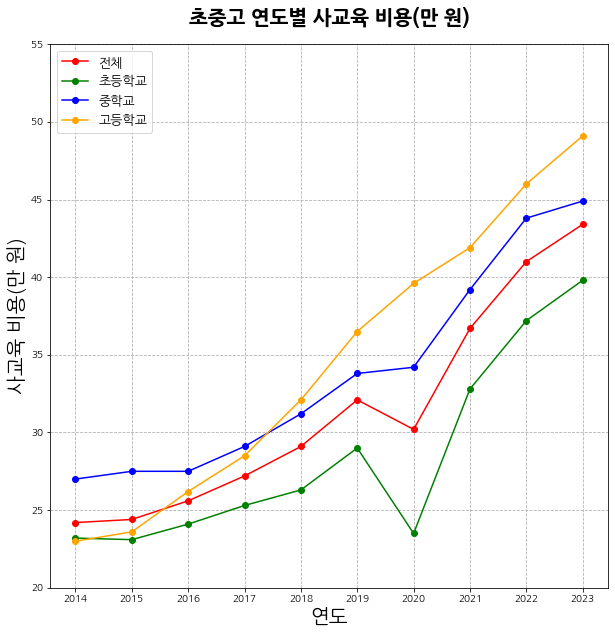

,연도,전체,초등학교,중학교,고등학교
0,2014,24.200001,23.200001,27.000000,23.000000
1,2015,24.400000,23.100000,27.500000,23.600000
2,2016,25.600000,24.100000,27.500000,26.200001
3,2017,27.200001,25.299999,29.100000,28.500000
4,2018,29.100000,26.299999,31.200001,32.099998
5,2019,32.099998,29.000000,33.799999,36.500000
6,2020,30.200001,23.500000,34.200001,39.599998
7,2021,36.700001,32.799999,39.200001,41.900002
8,2022,41.000000,37.200001,43.799999,46.000000
9,2023,43.400002,39.799999,44.900002,49.099998


In [1]:
## 사교육비 증가 추이 - 초중고별
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
import math

# Warning 메세지 무시
warnings.filterwarnings('ignore')

# 데이터 부르기
df2=pd.read_excel('학생 1인당 사교육비.xlsx')

# Cleansing & Fixing
df3=df2.T
df4=df3.set_index([1])
df5=df4.drop([18,19,20,21,22], axis=1).fillna('')
df5.reset_index()
df5.drop([0],axis=1).reset_index()
df6=df5.rename(columns=df5.iloc[0])
df7=df6.reset_index().drop([0],axis=0).drop(['단위:'],axis=1).set_index([1])
df7.index.values[0]=''
df8=df7.reset_index()

df8=df8.rename(columns={1:'연도'}).set_index(keys='연도').reset_index()
df8[1:].columns = df8[1:].iloc[0]

df8=df8.iloc[:,0:5]
col=['연도','전체','초등학교','중학교','고등학교']
df8.columns = col
df8=df8.drop([0],axis=0).reset_index().drop('index',axis=1)
df11=df8.astype({'전체':'float32','초등학교':'float32','중학교':'float32','고등학교':'float32'})
df11=df11.iloc[7:,:].reset_index().drop(columns='index',axis=1)

# 한글 폰트
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# 시각화
fig2=plt.figure(figsize=(10,10))
axes2=fig2.add_subplot(111)

axes2.plot(df11['연도'],df11['전체'],color='red',marker='o',label='전체')
axes2.plot(df11['연도'],df11['초등학교'],color='green',marker='o',label='초등학교')
axes2.plot(df11['연도'],df11['중학교'],color='blue',marker='o',label='중학교')
axes2.plot(df11['연도'],df11['고등학교'],color='orange',marker='o',label='고등학교')

plt.title("초중고 연도별 사교육 비용(만 원)",fontsize=20, fontweight='bold',pad=20)
plt.xlabel('연도',fontsize=20)
plt.ylabel('사교육 비용(만 원)',fontsize=20)
plt.yticks([20,25,30,35,40,45,50,55])
plt.grid(linestyle = '--')
plt.legend(loc=2,fontsize=13)
# plt.savefig('초중고 연도별 사교육 비용.png')
plt.savefig('초중고 연도별 사교육 비용.jpg')
plt.show()

df11